In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
from collections import Counter
import seaborn as sns #gia visualise tou confusion matrix
import matplotlib.pyplot as plt #gia visualise tou confusion matrix
from keras import Sequential
from keras.layers import Dense
import shap


In [8]:
df=pd.read_csv(r"C:\Users\gvarv\anaconda3\envs\thesis\media\bankloan.csv")
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID', axis=1) # Sto prwto column einai to LoanId
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])#['Y']/df['Loan_Status'].size #deixnei posa Yes kai No oxi , opote einai imbalanced
#opote tha xrhsimopoihsoume smote gia imbalancing
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
pre_y=df['Loan_Status'] #auto tha einai to prediction kai to leme pre gt thelei one hot encode
pre_X=df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1, N=0)) # edw kanoume to one hot encode, oti dhladh den einai arithmos kai einai 
#categorical tote tha kanoyme one hot gia na exoyn ola paromoiio weight

In [10]:
#edw kanoyme to SMOTE , pairnoyme to minority(to No's dld) to kanoyme scale
#kai to kanoume fit gia na exoume meta osa yes osa ki no + einai kai scaled
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X= sc.fit_transform(X1)


In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, shuffle=42)

In [12]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1] ))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(X_train,y_train, batch_size=20, epochs=100, verbose=0)
eval_model=classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9209


[0.19591592252254486, 0.9209039807319641]

In [34]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred>0.55)
#edw einai to limiter, dhladh px oti einai panw apo 0.58 parto san Yes, enw ta alla No

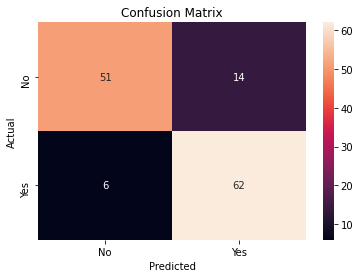

In [42]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [40]:
#classifier.save('BankLoanNN.h5')

In [41]:
#import pickle 
#import joblib 
#filename = 'loan_model.sav'
#pickle.dump(classifier, open(filename, 'wb'))

#ousiastika auto p kanei to pickle einai na kanei store ta weights(to pretrained model)
#wste otan to xreiastoyme na treksei gia alla data, na mhn kanei train gia kathe neo input